# Mapping

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
import urllib
import json
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import contextily as ctx

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%load_ext watermark

In [3]:
%watermark -v -p numpy,pandas,geopandas,matplotlib.pyplot,json,requests,sodapy

CPython 3.7.1
IPython 7.18.1

numpy 1.19.1
pandas 1.0.0
geopandas 0.8.1
matplotlib.pyplot 3.3.1
json 2.0.9
requests 2.24.0
sodapy 2.0.0


Documention for installing watermark: https://github.com/rasbt/watermark

In [196]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Reading and Writing Files

In [4]:
# Reading in GeoJSON
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [5]:
# Reading in shapefile inside a zip folder
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [6]:
ls data/

nta_shape.cpg      nta_shape.geojson  nta_shape.shp
nta_shape.dbf      nta_shape.prj      nta_shape.shx


In [7]:
# Writing to Shapefile:
nta_shape.to_file("data/nta_shape.shp")

# Writing to GeoJSON:
nta_shape.to_file("data/nta_shape.geojson", driver='GeoJSON')

In [8]:
ls data/

nta_shape.cpg      nta_shape.geojson  nta_shape.shp
nta_shape.dbf      nta_shape.prj      nta_shape.shx


# Basic Attributes

In [9]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [10]:
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
nta_shape.geometry.name

'geometry'

In [12]:
nta_shape.area

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      0.000534
1      0.000520
2      0.000195
3      0.000144
4      0.000227
         ...   
190    0.002228
191    0.000505
192    0.000468
193    0.000990
194    0.003059
Length: 195, dtype: float64

In [13]:
nta_shape.bounds

minx       miny       maxx       maxy
0   -74.007356  40.612638 -73.972903  40.644562
1   -73.826575  40.757736 -73.790315  40.779579
2   -73.876388  40.756634 -73.854496  40.771768
3   -73.958708  40.638422 -73.945706  40.655594
4   -73.771921  40.702334 -73.750471  40.719582
..         ...        ...        ...        ...
190 -74.024596  40.576751 -73.833559  40.709083
191 -73.849478  40.681147 -73.810633  40.704212
192 -73.816378  40.690874 -73.768445  40.715685
193 -73.940735  40.541834 -73.814753  40.615233
194 -73.928277  40.556422 -73.733558  40.782635

[195 rows x 4 columns]

In [14]:
nta_shape.total_bounds

array([-74.25559136,  40.4961154 , -73.70000906,  40.91553278])

In [15]:
nta_shape.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
190    MultiPolygon
191    MultiPolygon
192    MultiPolygon
193    MultiPolygon
194    MultiPolygon
Length: 195, dtype: object

In [16]:
nta_shape.is_valid

0      True
1      True
2      True
3      True
4      True
       ... 
190    True
191    True
192    True
193    True
194    True
Length: 195, dtype: bool

# Basic Methods

In [17]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [18]:
school_points.distance(nta_shape.to_crs(epsg=2263))

/Users/geribauer/anaconda3/lib/python3.7/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0        4351.211760
1       51984.787634
2       64817.989627
3       14146.470303
4       71178.727258
            ...     
1704             NaN
1705             NaN
1706             NaN
1707             NaN
1708             NaN
Length: 1709, dtype: float64

In [19]:
nta_shape.centroid

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      POINT (-73.98866 40.63095)
1      POINT (-73.80955 40.76835)
2      POINT (-73.86840 40.76335)
3      POINT (-73.95162 40.64612)
4      POINT (-73.76114 40.71064)
                  ...            
190    POINT (-73.91960 40.62311)
191    POINT (-73.83093 40.69454)
192    POINT (-73.79398 40.70437)
193    POINT (-73.87620 40.57164)
194    POINT (-73.83211 40.68976)
Length: 195, dtype: geometry

In [20]:
nta_shape.representative_point()

0      POINT (-73.98956 40.62861)
1      POINT (-73.80888 40.76894)
2      POINT (-73.86841 40.76395)
3      POINT (-73.95221 40.64725)
4      POINT (-73.76157 40.71109)
                  ...            
190    POINT (-73.89615 40.59313)
191    POINT (-73.82903 40.69297)
192    POINT (-73.80035 40.70325)
193    POINT (-73.92328 40.55535)
194    POINT (-73.87597 40.69576)
Length: 195, dtype: geometry

In [21]:
print("old crs " + str(nta_shape.crs))
print("new crs " + str(nta_shape.to_crs(epsg=2263).crs))

old crs epsg:4326
new crs epsg:2263


<AxesSubplot:>

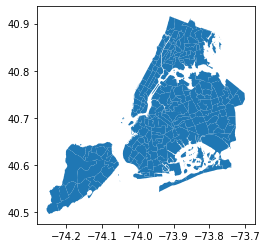

In [22]:
nta_shape.plot()

In [23]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

## Create centroids from polygons

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

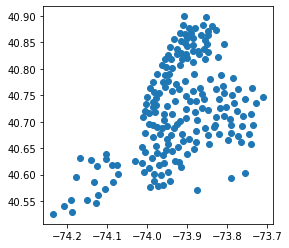

In [24]:
nta_shape['centroid_column'] = nta_shape.centroid

nta_shape = nta_shape.set_geometry('centroid_column')

nta_shape.plot()

In [25]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...   
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...   
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...   
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...   

              centroid_column  
0  POINT (-73.98866 40.63095)  
1  POINT (-73.80955 40.76835)  
2  POINT (-73.86840 40.76335)  
3  POINT (-73.95162 40.64612)  
4  POINT (-73.76114 40.71064)

# Geometric Objects - Polygons, Lines, and Points

## Polygons

In [26]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

<AxesSubplot:>

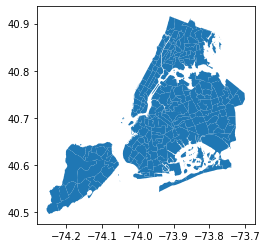

In [27]:
nta_shape.plot()

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

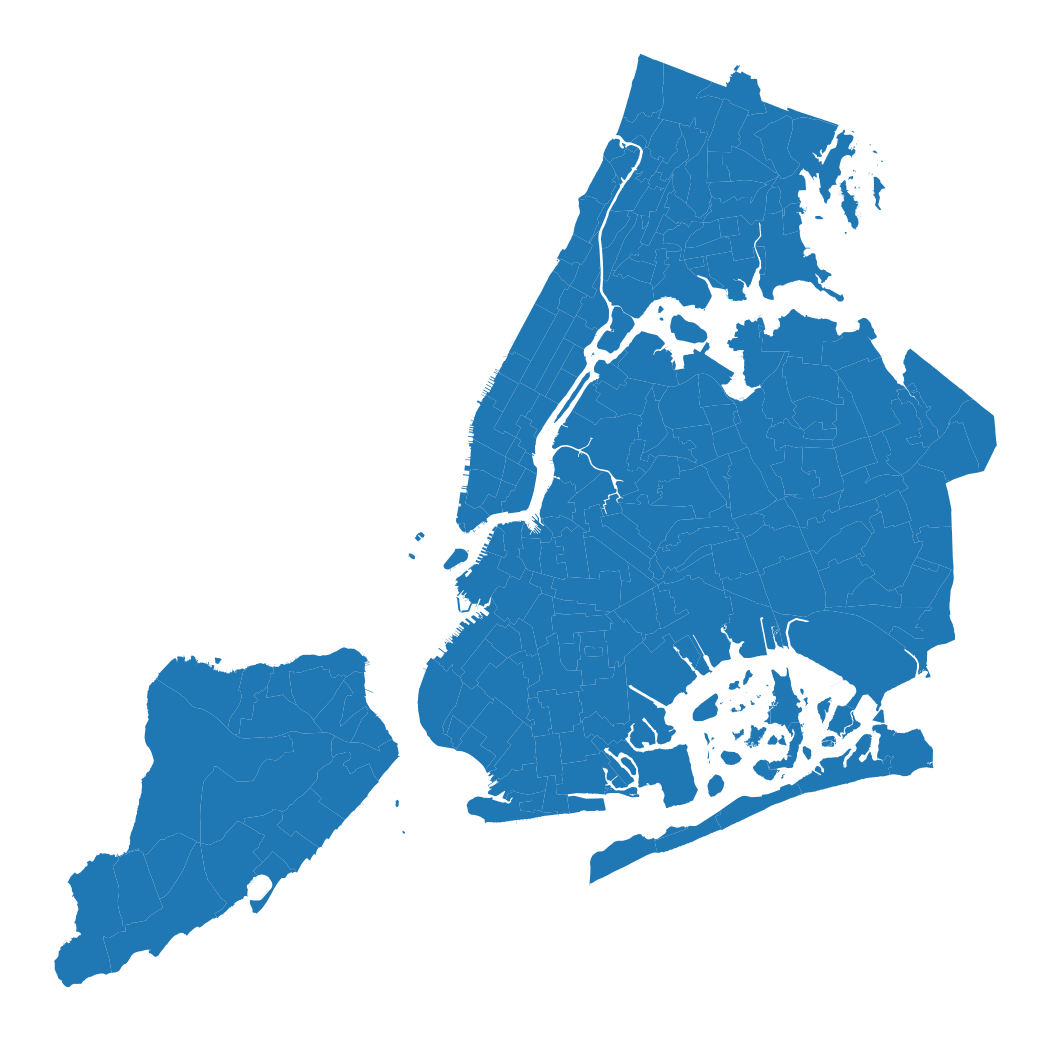

In [28]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape = nta_shape.to_crs(epsg=2263) # converting to more accurate coordinate referance system
nta_shape.plot(ax=ax, color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

## Lines

In [29]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

streets.head()

rw_type l_low_hn pre_direct st_width  r_zip r_low_hn bike_lane post_type  \
0       6     None       None        0  10458     None      None       TRL   
1       1  215-001       None       35  11360  215-000      None       AVE   
2       1     5631       None       42  10471     5602      None       AVE   
3       1      317       None       50  11217      316         2        ST   
4       1  120-011       None       40  11415        0      None      BLVD   

   r_blkfc_id bike_trafd  ... snow_pri borocode trafdir pre_modifi  \
0           0       None  ...     None        2      NV       None   
1   112262650       None  ...        S        4      TW       None   
2  1522601877       None  ...        H        2      TW       None   
3  1922612977         TW  ...        C        3      TW       None   
4    92269521       None  ...        C        4      TF       None   

                      st_label physicalid                  st_name  \
0  MITSUBISHI WILD WETLAND TRL     164809  MITSUBISHI WILD WETLAND   
1                       28 AVE       6110                       28   
2                ARLINGTON AVE      61140                ARLINGTON   
3              SCHERMERHORN ST     145494             SCHERMERHORN   
4                  QUEENS BLVD      12438                   QUEENS   

               created l_high_hn  \
0  2014-08-19T00:00:00      None   
1  2007-11-29T00:00:00   215-027   
2  2007-11-29T00:00:00      5699   
3  2007-11-29T00:00:00       399   
4  2007-11-29T00:00:00   120-011   

                                            geometry  
0  MULTILINESTRING ((-73.87862 40.86192, -73.8786...  
1  MULTILINESTRING ((-73.77290 40.77780, -73.7720...  
2  MULTILINESTRING ((-73.90711 40.90519, -73.9067...  
3  MULTILINESTRING ((-73.98182 40.68733, -73.9805...  
4  MULTILINESTRING ((-73.83002 40.71401, -73.8298...  

[5 rows x 32 columns]

<AxesSubplot:>

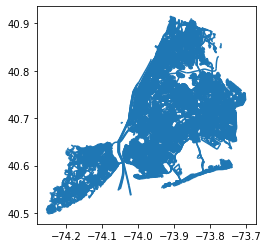

In [30]:
streets.plot()

(905650.6073791477, 1075080.906658936, 113170.08619376768, 280284.1900511943)

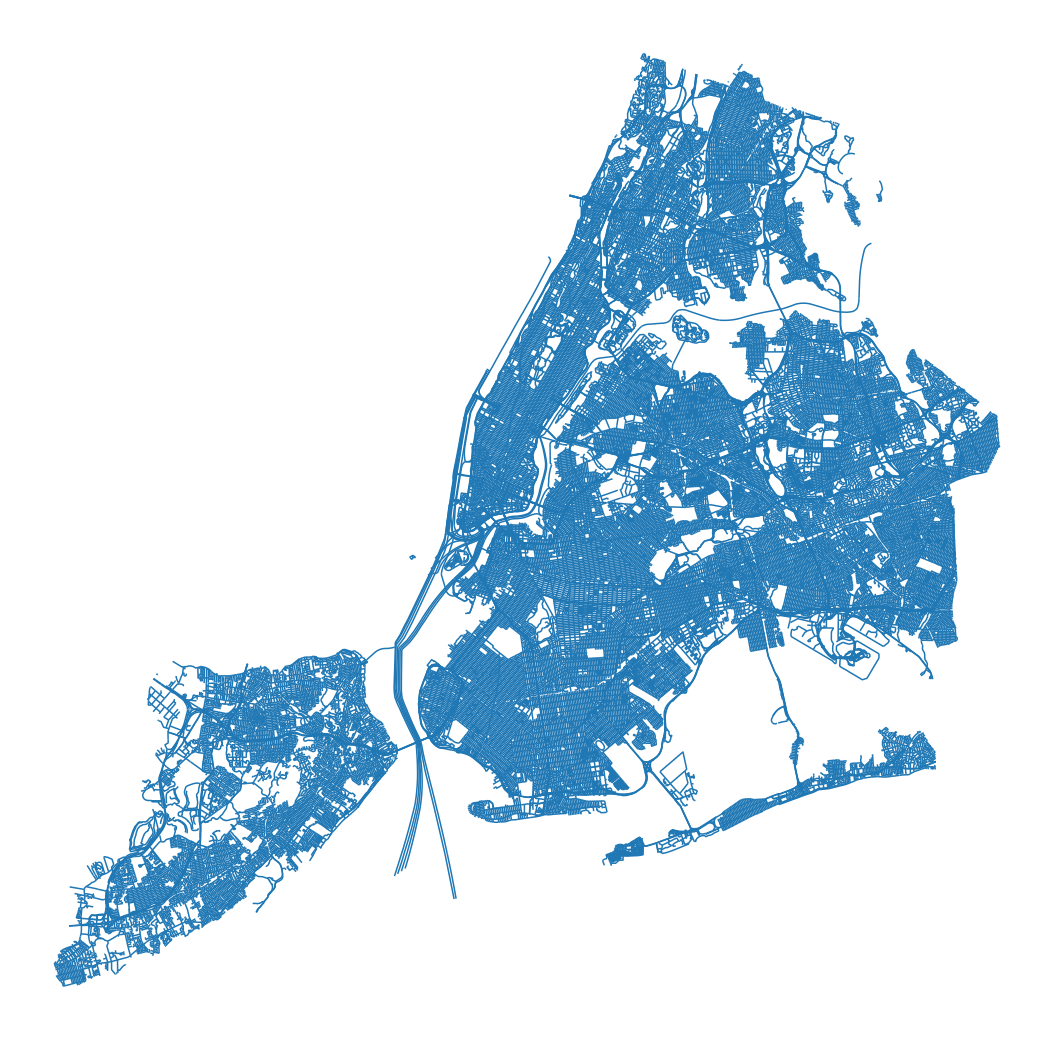

In [31]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

streets = streets.to_crs(epsg=2263) # converting to more accurate coordinate referance system
streets.plot(ax=ax, color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

## Points

In [32]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K      2.0     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

<AxesSubplot:>

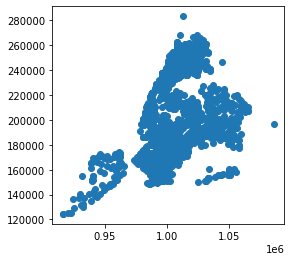

In [33]:
school_points.plot()

(907923.4919270311, 1094296.2593642443, 116536.22718050248, 291270.9651156455)

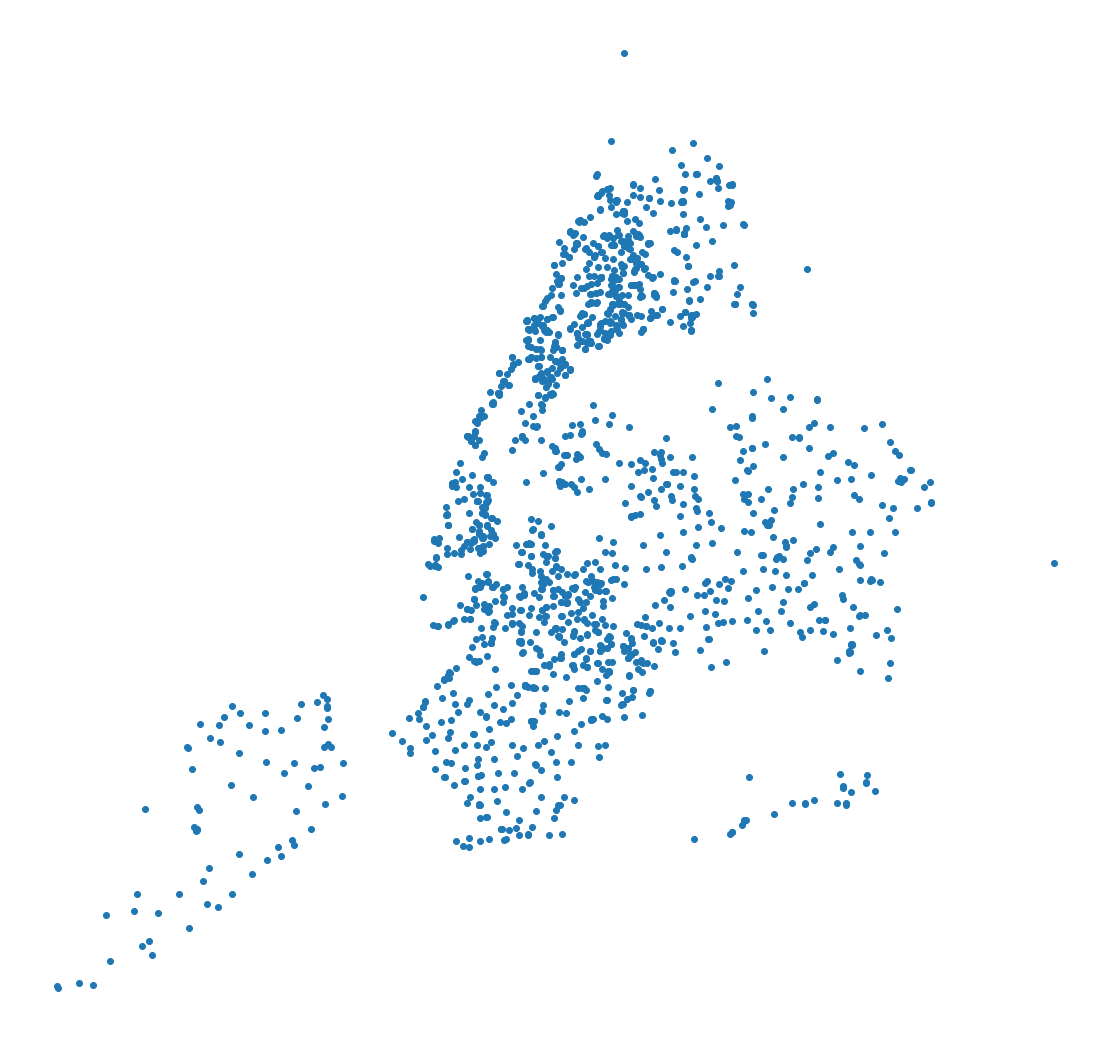

In [34]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

school_points = school_points.to_crs(epsg=2263) # converting to more accurate coordinate referance system
school_points.plot(ax=ax, color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

# Maps with layers

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

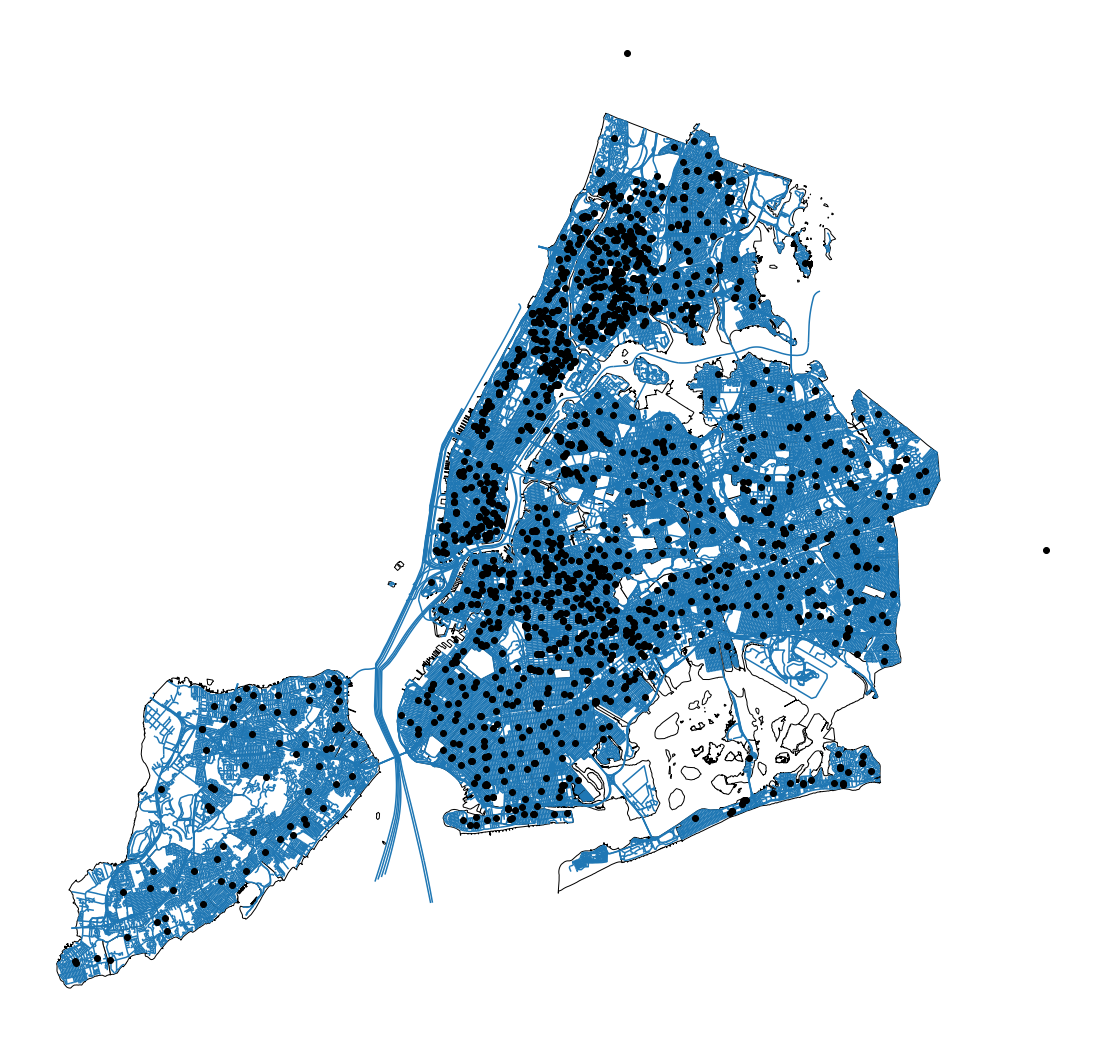

In [35]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_aspect('equal')

nta_shape.plot(ax=ax, color='white', edgecolor='black', zorder=1)
streets.plot(ax=ax, zorder=2)
school_points.plot(ax=ax, color='black', zorder=3)

plt.tight_layout()
plt.axis('off')

# Adding background map to plots

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

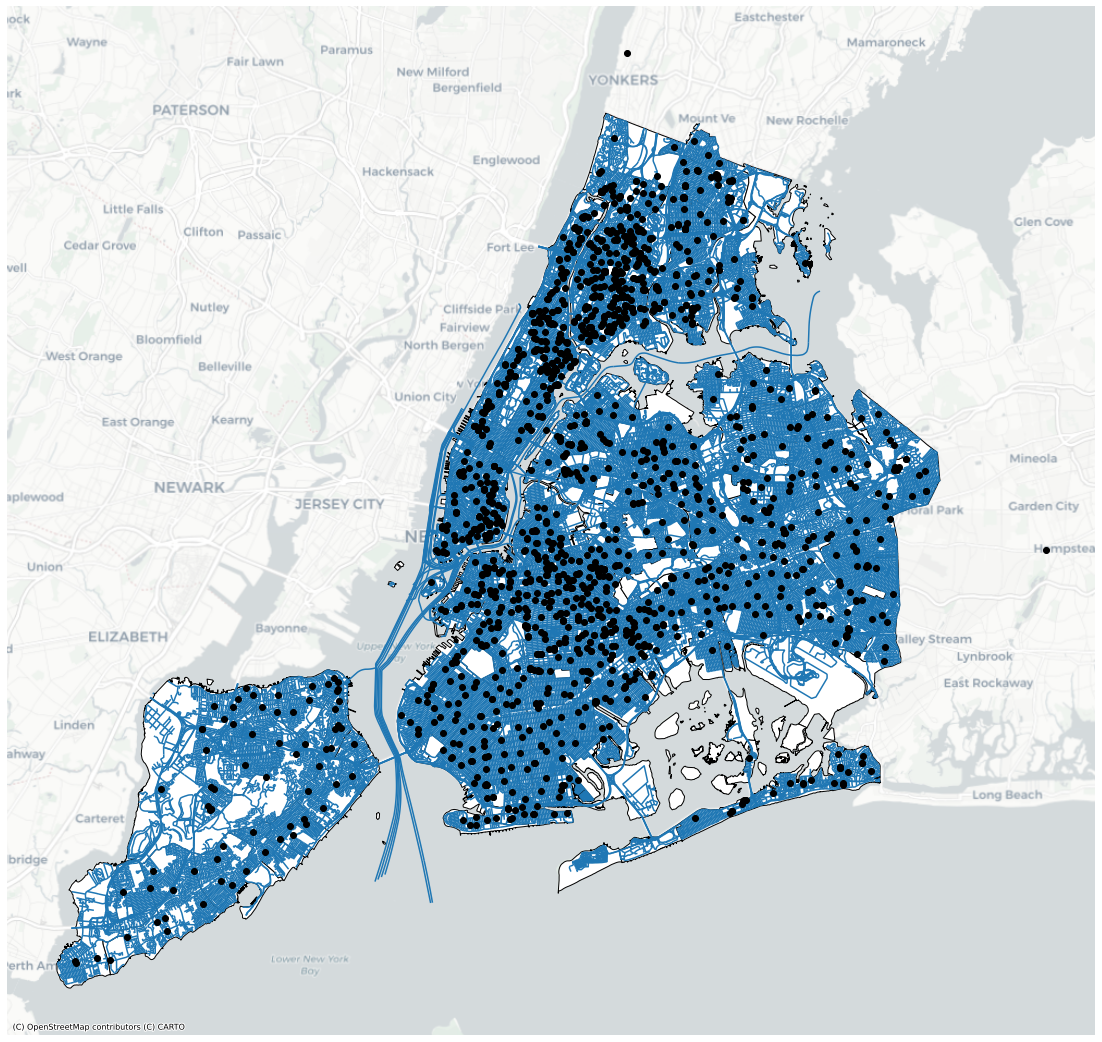

In [36]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

nta_shape.plot(ax=ax, color='white', edgecolor='black', zorder=1)
streets.plot(ax=ax, zorder=2)
school_points.plot(ax=ax, color='black', zorder=3)

ctx.add_basemap(ax, 
                crs=2263, 
                source=ctx.providers.CartoDB.Positron)

plt.tight_layout()
plt.axis('off')

# Clip Data

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

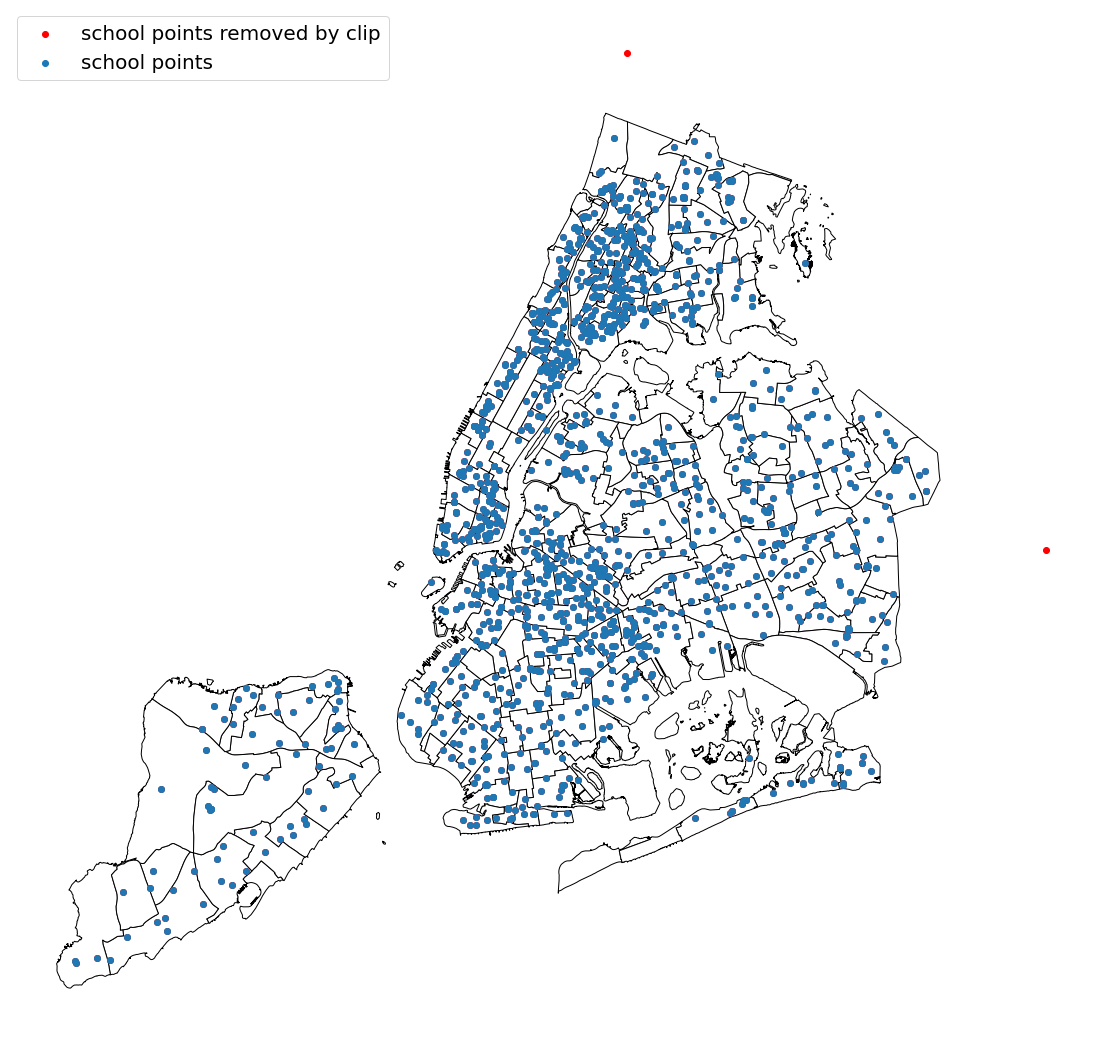

In [37]:
school_points_clipped = gpd.clip(school_points, nta_shape)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

nta_shape.plot(ax=ax, color="white", edgecolor='black', zorder=1)                                
school_points.plot(ax=ax, color='red', zorder=2)
school_points_clipped.plot(ax=ax, color='#1f77b4', zorder=3)

plt.legend(['school points removed by clip', 'school points'], loc='upper left', fontsize=20)
plt.tight_layout()
plt.axis('off')

# Choropleth Maps

In [274]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [275]:
nyc_pop['Year'].unique()

array([2000, 2010])

In [276]:
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

In [277]:
nyc_pop['Year'].unique()

array([2010])

In [278]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [279]:
nta_pop = nta_shape.merge(nyc_pop, left_on='ntacode', right_on='NTA Code', how='inner')

In [280]:
nta_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  Brooklyn   
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...    Queens   
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...    Queens   
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  Brooklyn   
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population  
0  2010                47     BK88   Borough Park      106357  
1  2010                81     QN51    Murray Hill       51739  
2  2010                81     QN27  East Elmhurst       23150  
3  2010                47     BK95        Erasmus       29938  
4  2010                81     QN07         Hollis       20269

In [281]:
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [282]:
nta_pop.to_crs(epsg=2263, inplace=True)
nta_pop.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [283]:
nta_pop['ft_sq'] = nta_pop.area
nta_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  
0  2010                47     BK88   Borough Park      106357 54005019.048  
1  2010                81     QN51    Murray Hill       51739 52488277.591  
2  2010                81     QN27  East Elmhurst       23150 19726946.569  
3  2010                47     BK95        Erasmus       29938 14522603.592  
4  2010                81     QN07         Hollis       20269 22887772.809

In [284]:
nta_pop['mi_sq'] = nta_pop['ft_sq'] / 27878400

nta_pop.head()   

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  \
0  2010                47     BK88   Borough Park      106357 54005019.048   
1  2010                81     QN51    Murray Hill       51739 52488277.591   
2  2010                81     QN27  East Elmhurst       23150 19726946.569   
3  2010                47     BK95        Erasmus       29938 14522603.592   
4  2010                81     QN07         Hollis       20269 22887772.809   

   mi_sq  
0  1.937  
1  1.883  
2  0.708  
3  0.521  
4  0.821

In [285]:
nta_pop['density (pop/mi_sq)'] = nta_pop['Population'] / nta_pop['mi_sq']

In [286]:
nta_pop.sort_values(by='density (pop/mi_sq)', ascending=False).iloc[:5,-6:]

NTA Code         NTA Name  Population        ft_sq  mi_sq  \
79      MN32        Yorkville       77942 13602039.796  0.488   
90      BX40    Fordham South       28262  6308875.236  0.226   
126     MN22     East Village       44136 10894242.599  0.391   
61      MN14   Lincoln Square       61489 15805523.623  0.567   
87      MN12  Upper West Side      132378 34379942.456  1.233   

     density (pop/mi_sq)  
79            159747.971  
90            124887.450  
126           112944.158  
61            108456.700  
87            107344.183

<AxesSubplot:>

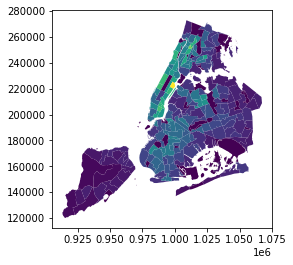

In [287]:
nta_pop.plot(column='density (pop/mi_sq)')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

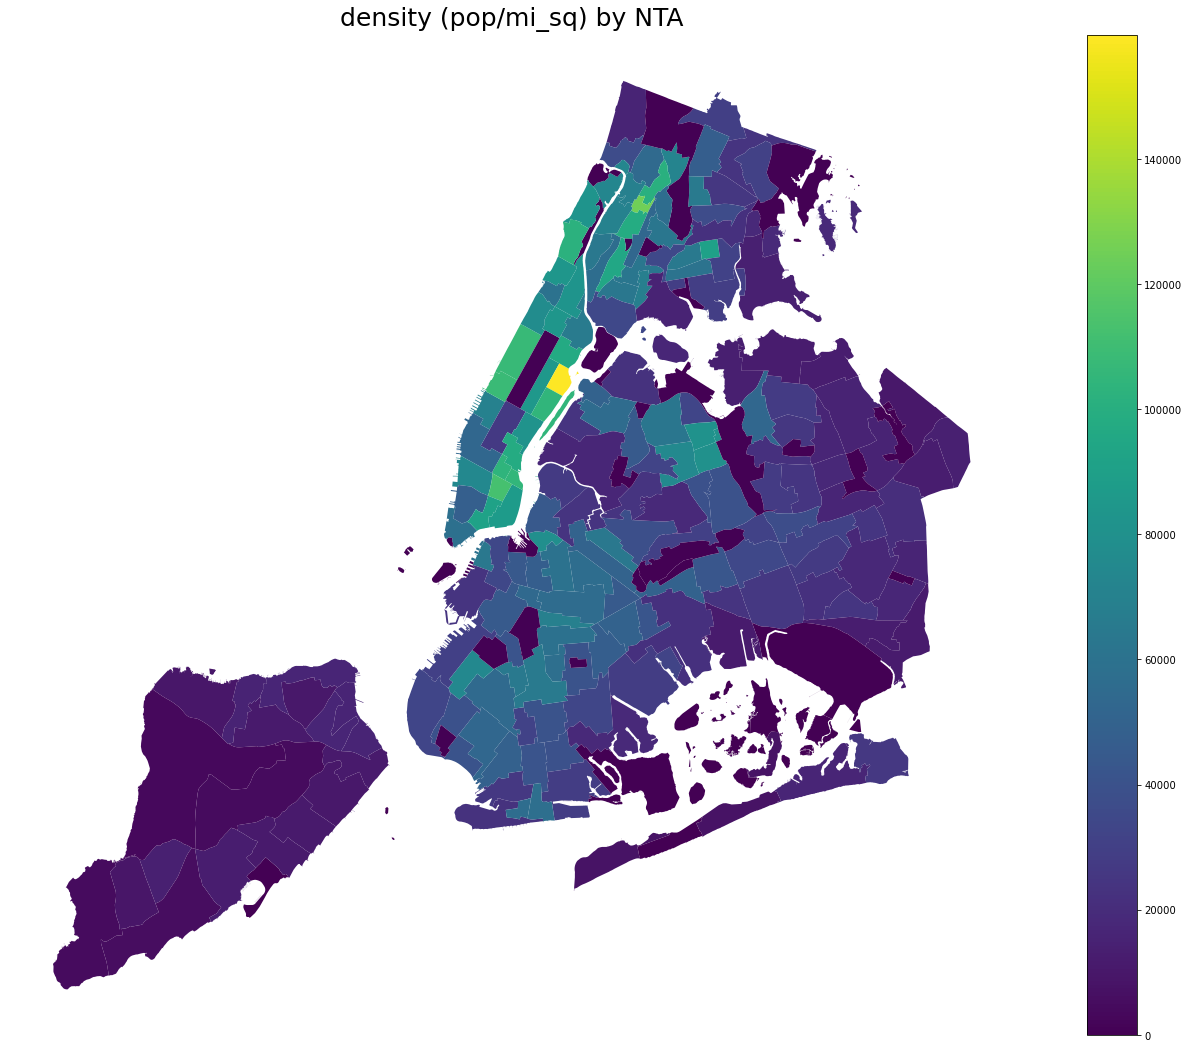

In [288]:
fig, ax = plt.subplots(figsize=(20,15))

nta_pop.plot(column='density (pop/mi_sq)', ax=ax, 
             legend=True)

ax.set_title('density (pop/mi_sq) by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

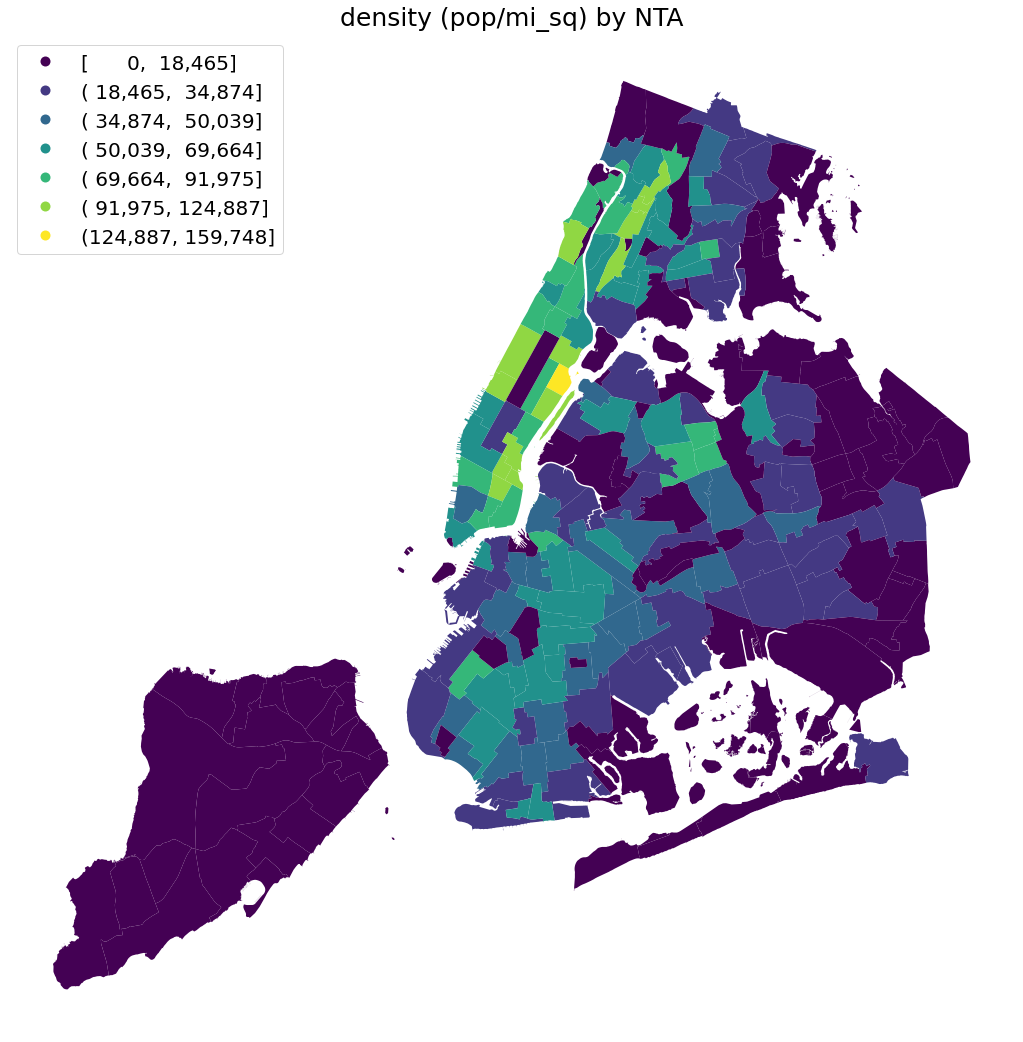

In [289]:
fig, ax = plt.subplots(figsize=(20,15))

nta_pop.plot(column='density (pop/mi_sq)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k = 7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "20"})

ax.set_title('density (pop/mi_sq) by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')

In [290]:
nta_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ntacode              195 non-null    object  
 1   shape_area           195 non-null    object  
 2   county_fips          195 non-null    object  
 3   ntaname              195 non-null    object  
 4   shape_leng           195 non-null    object  
 5   boro_name            195 non-null    object  
 6   boro_code            195 non-null    object  
 7   geometry             195 non-null    geometry
 8   Borough              195 non-null    object  
 9   Year                 195 non-null    int64   
 10  FIPS County Code     195 non-null    int64   
 11  NTA Code             195 non-null    object  
 12  NTA Name             195 non-null    object  
 13  Population           195 non-null    int64   
 14  ft_sq                195 non-null    float64 
 15  mi_sq          

# Joining Data

## Attribute Join

In [291]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [292]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [293]:
print(nta_shape['ntaname'].dtype)
print(nyc_pop['NTA Name'].dtype)

object
object


In [294]:
nta_with_pop = nta_shape.merge(nyc_pop, left_on='ntacode', right_on='NTA Code')

In [295]:
nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
2    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
3    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
4    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  Brooklyn   
1         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  Brooklyn   
2         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...    Queens   
3         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...    Queens   
4         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population  
0  2000                47     BK88   Borough Park      101055  
1  2010                47     BK88   Borough Park      106357  
2  2000                81     QN51    Murray Hill       53009  
3  2010                81     QN51    Murray Hill       51739  
4  2000                81     QN27  East Elmhurst       21183

In [296]:
nta_with_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [297]:
nta_with_pop.to_crs(epsg=2263, inplace=True)
nta_with_pop.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [298]:
nta_with_pop['ft_sq'] = nta_with_pop.area
nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
2    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
3    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
4    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
2         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
3         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
4         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  
0  2000                47     BK88   Borough Park      101055 54005019.048  
1  2010                47     BK88   Borough Park      106357 54005019.048  
2  2000                81     QN51    Murray Hill       53009 52488277.591  
3  2010                81     QN51    Murray Hill       51739 52488277.591  
4  2000                81     QN27  East Elmhurst       21183 19726946.569

In [299]:
nta_with_pop['mi_sq'] = nta_with_pop['ft_sq'] / 27878400

nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
2    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
3    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
4    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
2         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
3         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
4         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  \
0  2000                47     BK88   Borough Park      101055 54005019.048   
1  2010                47     BK88   Borough Park      106357 54005019.048   
2  2000                81     QN51    Murray Hill       53009 52488277.591   
3  2010                81     QN51    Murray Hill       51739 52488277.591   
4  2000                81     QN27  East Elmhurst       21183 19726946.569   

   mi_sq  
0  1.937  
1  1.937  
2  1.883  
3  1.883  
4  0.708

In [300]:
nta_with_pop['density (pop/mi_sq)'] = nta_with_pop['Population'] / nta_with_pop['mi_sq']

<AxesSubplot:>

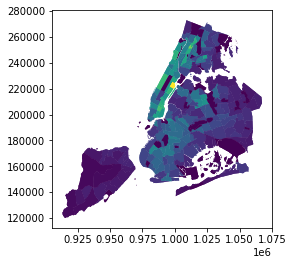

In [301]:
nta_with_pop.plot(column='density (pop/mi_sq)')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

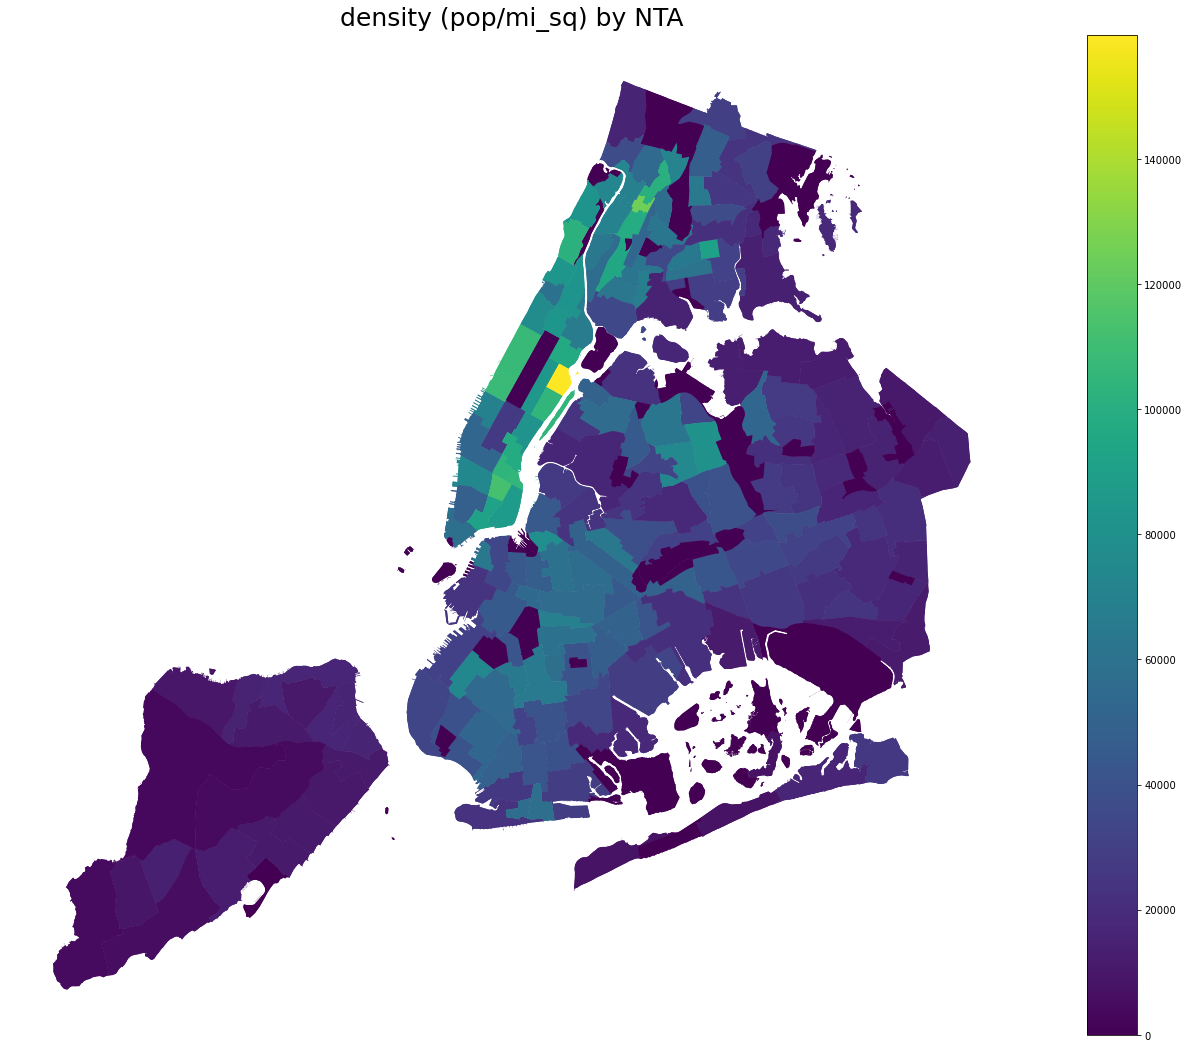

In [302]:
fig, ax = plt.subplots(figsize=(20,15))

nta_with_pop.plot(column='density (pop/mi_sq)', 
                  ax=ax, 
                  legend=True)

ax.set_title('density (pop/mi_sq) by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')

## Spatial Join

In [303]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [304]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [305]:
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [306]:
school_points.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [307]:
nta_shape.to_crs(epsg=2263, inplace=True)
nta_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [308]:
school_points_with_nta = gpd.sjoin(school_points, nta_shape, how="inner", op='intersects')

In [309]:
school_points_with_nta.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0    b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
36   b'15K136 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K136   
65   b'15K172 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K172   
168  b'15K295 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K295   
222  b'75K371 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K371   

                               SCHOOLNAME                         SCH_TYPE  \
0                     P.S. 001 THE BERGEN                       Elementary   
36              I.S. 136 CHARLES O. DEWEY  Junior High-Intermediate-Middle   
65   P.S. 172 BEACON SCHOOL OF EXCELLENCE                       Elementary   
168                              P.S. 295                       Elementary   
222         P.S. 371 - LILLIAN L. RASHKIS                      High school   

     MANAGED_BY  GEO_DISTRI  ADMIN_DIST        ADDRESS  ...      City  \
0             1          15          15  309 47 STREET  ...  BROOKLYN   
36            1          15          15  4004 4 AVENUE  ...  BROOKLYN   
65            1          15          15   825 4 AVENUE  ...  BROOKLYN   
168           1          15          15  330 18 STREET  ...  BROOKLYN   
222           1          15          75  355 37 STREET  ...  BROOKLYN   

                          geometry index_right ntacode     shape_area  \
0    POINT (980985.054 175780.759)         121    BK32  49990015.8359   
36   POINT (982218.628 176813.496)         121    BK32  49990015.8359   
65   POINT (984158.590 178921.890)         121    BK32  49990015.8359   
168  POINT (987330.493 180120.659)         121    BK32  49990015.8359   
222  POINT (982776.837 177607.547)         121    BK32  49990015.8359   

    county_fips           ntaname     shape_leng  boro_name boro_code  
0           047  Sunset Park West  83323.5061834   Brooklyn         3  
36          047  Sunset Park West  83323.5061834   Brooklyn         3  
65          047  Sunset Park West  83323.5061834   Brooklyn         3  
168         047  Sunset Park West  83323.5061834   Brooklyn         3  
222         047  Sunset Park West  83323.5061834   Brooklyn         3  

[5 rows x 26 columns]

<AxesSubplot:>

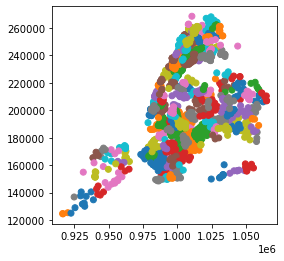

In [310]:
school_points_with_nta.plot(column='ntaname')

In [311]:
school_points_with_nta[school_points_with_nta['boro_name'] == 'Staten Island'].head()

ATS_CODE BORO  BORONUM LOC_CODE  \
990   b'31R001 \xa0\xa0\xa0\xa0\xa0'    R    5.000     R001   
995   b'31R006 \xa0\xa0\xa0\xa0\xa0'    R    5.000     R006   
1016  b'31R034 \xa0\xa0\xa0\xa0\xa0'    R    5.000     R034   
991   b'31R002 \xa0\xa0\xa0\xa0\xa0'    R    5.000     R002   
1020  b'31R038 \xa0\xa0\xa0\xa0\xa0'    R    5.000     R038   

                                    SCHOOLNAME  \
990                       P.S. 001 TOTTENVILLE   
995   P.S. 6 CORPORAL ALLAN F. KIVLEHAN SCHOOL   
1016                      I.S. 034 TOTTENVILLE   
991                 I.S. R002 GEORGE L. EGBERT   
1020                  P.S. 038 GEORGE CROMWELL   

                             SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
990                        Elementary           1          31          31   
995                        Elementary           1          31          31   
1016  Junior High-Intermediate-Middle           1          31          31   
991   Junior High-Intermediate-Middle           1          31          31   
1020                       Elementary           1          31          31   

                 ADDRESS  ...           City                       geometry  \
990     58 SUMMIT STREET  ...  STATEN ISLAND  POINT (916394.981 124757.713)   
995      555 PAGE AVENUE  ...  STATEN ISLAND  POINT (920131.894 125360.135)   
1016  528 ACADEMY AVENUE  ...  STATEN ISLAND  POINT (916600.638 124478.715)   
991   333 MIDLAND AVENUE  ...  STATEN ISLAND  POINT (956307.977 149595.224)   
1020  421 LINCOLN AVENUE  ...  STATEN ISLAND  POINT (956627.476 148713.348)   

     index_right ntacode     shape_area county_fips  \
990           76    SI11  145674612.035         085   
995           76    SI11  145674612.035         085   
1016          76    SI11  145674612.035         085   
991           98    SI45  55429451.2602         085   
1020          98    SI45  55429451.2602         085   

                                     ntaname     shape_leng      boro_name  \
990   Charleston-Richmond Valley-Tottenville  84848.4551217  Staten Island   
995   Charleston-Richmond Valley-Tottenville  84848.4551217  Staten Island   
1016  Charleston-Richmond Valley-Tottenville  84848.4551217  Staten Island   
991                   New Dorp-Midland Beach  34336.5208858  Staten Island   
1020                  New Dorp-Midland Beach  34336.5208858  Staten Island   

     boro_code  
990          5  
995          5  
1016         5  
991          5  
1020         5  

[5 rows x 26 columns]

In [312]:
schools_in_si = school_points_with_nta[school_points_with_nta['boro_name'] == 'Staten Island']

schools_count = schools_in_si.groupby(by='ntaname')['SCHOOLNAME'].count().reset_index().sort_values(by='SCHOOLNAME', ascending=True)

In [313]:
schools_count.head()

ntaname  SCHOOLNAME
13                  Rossville-Woodrow           1
17                        Westerleigh           2
1                       Arden Heights           2
10              Oakwood-Oakwood Beach           2
11  Old Town-Dongan Hills-South Beach           2

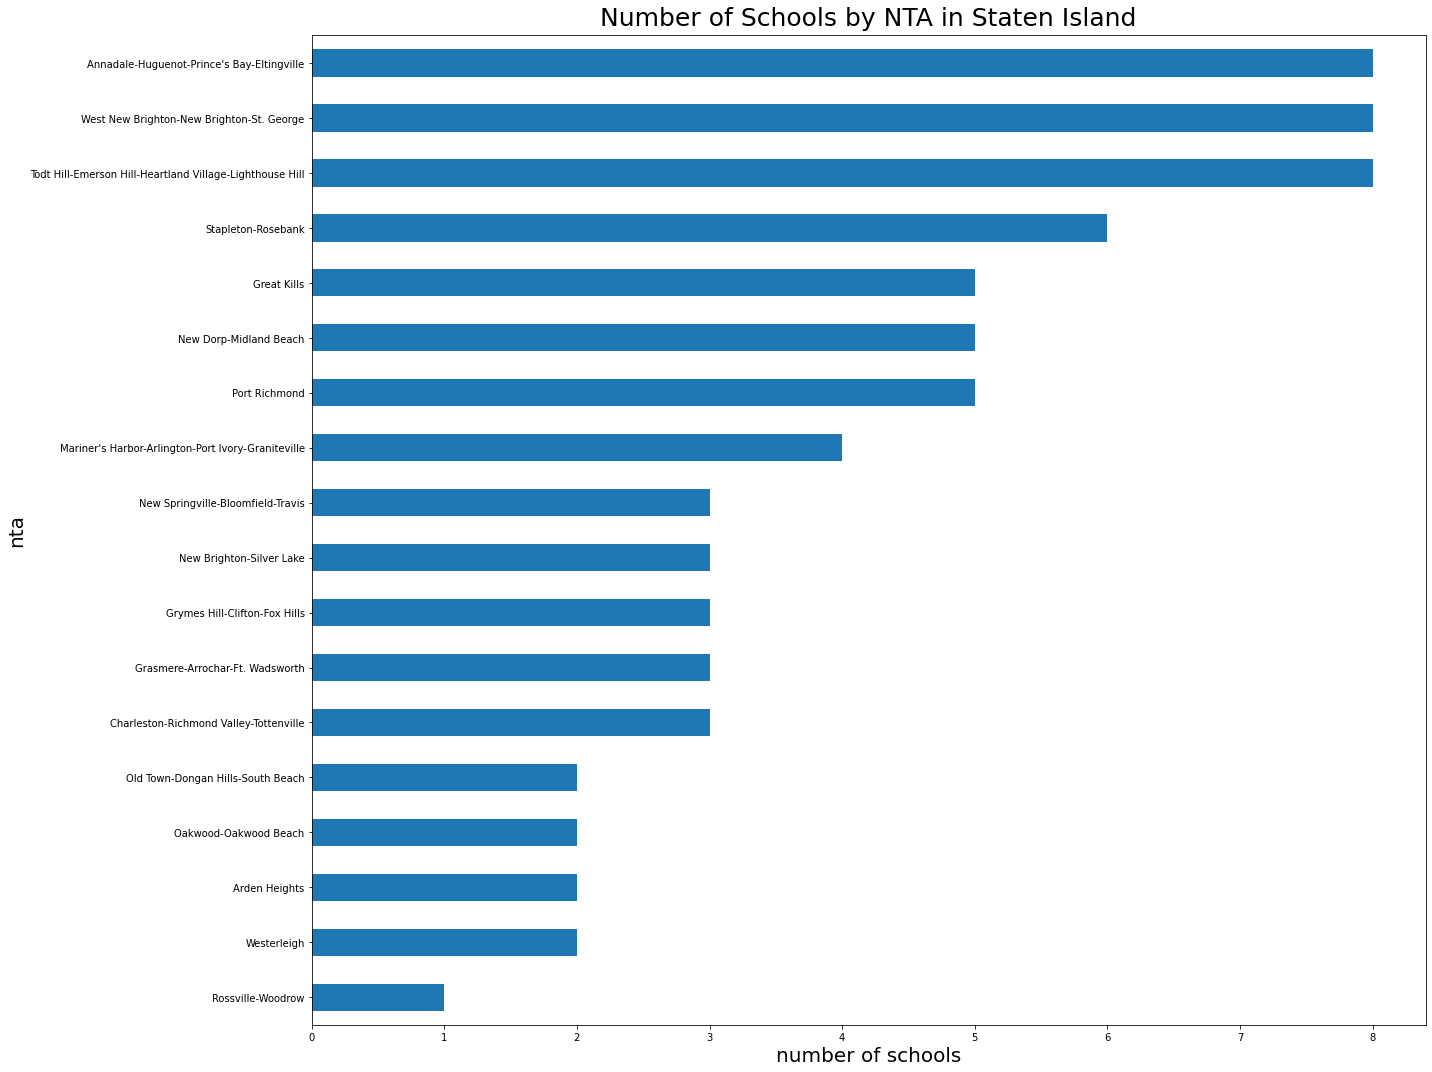

In [314]:
fig, ax = plt.subplots(figsize=(20,15))

schools_count.plot('ntaname', 'SCHOOLNAME', kind='barh', ax=ax, legend=False)

ax.set_title('Number of Schools by NTA in Staten Island', fontsize=25, pad=10)

plt.ylabel('nta', fontsize=20)
plt.xlabel('number of schools', fontsize=20)
plt.tight_layout()